In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')

In [57]:
df = pd.read_csv('Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv')

In [58]:
df.head(2)

,CATEGORÍA_Agroindustrial,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Construcción y Mantenimiento,CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Eléctricos y Electrónicos,CATEGORÍA_Gestión ambiental,CATEGORÍA_Imprenta y litografía,CATEGORÍA_Logística y transporte,...,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011488,8.570006e-07,0.000029,0.000029,0.009998,0.009998,0.0,0.999834,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113017,5.621736e-06,0.000028,0.000000,0.098380,0.098380,0.0,0.983804,0.0,0.000011


Delete 'FECHA_ÚLTIMO_MOVIMIENTO'

In [59]:
df =df.loc[:, df.columns != 'FECHA_ÚLTIMO_MOVIMIENTO']

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Columns: 261 entries, CATEGORÍA_Agroindustrial to DURACIÓN_APROBACIÓN
dtypes: float64(261)
memory usage: 1017.6 KB


In [61]:
df.head(3)

,CATEGORÍA_Agroindustrial,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Construcción y Mantenimiento,CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Eléctricos y Electrónicos,CATEGORÍA_Gestión ambiental,CATEGORÍA_Imprenta y litografía,CATEGORÍA_Logística y transporte,...,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011488,8.570006e-07,0.000029,0.000029,0.009998,0.009998,0.0,0.999834,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113017,5.621736e-06,0.000028,0.000000,0.098380,0.098380,0.0,0.983804,0.0,0.000011
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.225206,1.120231e-05,0.000022,0.000000,0.229647,0.229647,0.0,0.918589,0.0,0.000022


# CLUSTERING

In [62]:
from sklearn import metrics
from sklearn.cluster import KMeans

## ELBOW METHOD

In [63]:
wcss = []
for i in range (1, 18):
    kmeans = KMeans(n_clusters=i, max_iter=200)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Clustering score')

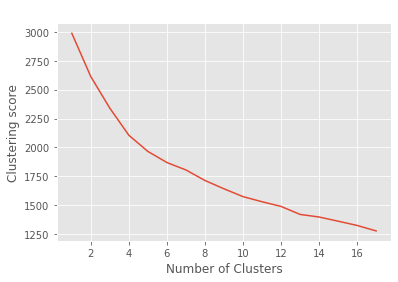

In [64]:
plt.plot(range(1,18), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering score')

As we have seen the optimal n_cluster =4

## CREATE THE CLUSTER WITH OPTIMAL N_CLUSTER

In [65]:
clustering = KMeans(n_clusters=4, max_iter=300)
clustering.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
df_scaled = df[3:4]
df_scaled

,CATEGORÍA_Agroindustrial,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Construcción y Mantenimiento,CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Eléctricos y Electrónicos,CATEGORÍA_Gestión ambiental,CATEGORÍA_Imprenta y litografía,CATEGORÍA_Logística y transporte,...,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215863,0.000005,0.000027,0.000027,0.187913,0.187913,0.0,0.939564,0.0,0.0


In [67]:
# df['KMeans_Cluster'] = clustering.labels_
df.head()

,CATEGORÍA_Agroindustrial,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Construcción y Mantenimiento,CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Eléctricos y Electrónicos,CATEGORÍA_Gestión ambiental,CATEGORÍA_Imprenta y litografía,CATEGORÍA_Logística y transporte,...,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011488,8.570006e-07,0.000029,0.000029,0.009998,0.009998,0.000000,0.999834,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113017,5.621736e-06,0.000028,0.000000,0.098380,0.098380,0.000000,0.983804,0.0,0.000011
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.225206,1.120231e-05,0.000022,0.000000,0.229647,0.229647,0.000000,0.918589,0.0,0.000022
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215863,5.368937e-06,0.000027,0.000027,0.187913,0.187913,0.000000,0.939564,0.0,0.000000
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006757,6.267798e-06,0.000013,0.000013,0.350997,0.417686,0.066689,0.835372,0.0,0.000000


## CLUSTER CENTERS

Data Frame of 4 clusters with normalized data

In [71]:
df_centroids = pd.DataFrame(clustering.cluster_centers_, columns=df.columns)
df_centroids

,CATEGORÍA_Agroindustrial,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Construcción y Mantenimiento,CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Eléctricos y Electrónicos,CATEGORÍA_Gestión ambiental,CATEGORÍA_Imprenta y litografía,CATEGORÍA_Logística y transporte,...,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,-5.204170e-18,2.542373e-02,8.474576e-03,7.542373e-01,3.122502e-17,8.474576e-02,-1.734723e-18,-3.469447e-18,-1.040834e-17,1.016949e-01,...,0.852829,0.000395,0.000048,0.000034,0.177436,0.188840,0.011404,0.288738,0.000036,0.000137
1,2.000000e-02,4.933333e-01,6.666667e-03,1.066667e-01,-3.469447e-18,5.551115e-17,-1.734723e-18,6.666667e-03,-1.040834e-17,2.666667e-02,...,0.597452,0.018504,0.000761,0.000263,0.192702,0.204106,0.011404,0.429064,0.000808,0.032252
2,-5.204170e-18,-2.775558e-16,-1.110223e-16,3.566879e-01,5.732484e-02,6.245005e-17,6.369427e-03,6.369427e-03,3.821656e-02,-2.775558e-17,...,0.149966,0.004056,0.000411,0.000152,0.354636,0.422029,0.067392,0.689509,0.000493,0.000729
3,-4.336809e-18,2.702703e-02,3.243243e-01,-5.551115e-16,1.734723e-17,-1.387779e-17,-1.301043e-18,-2.602085e-18,-8.673617e-18,-2.081668e-17,...,0.102484,0.000051,0.000105,0.000093,0.036249,0.041786,0.005537,0.919282,0.000003,0.000008


# DF WITH LABELS OF CLUSTER

In [81]:
df['KMeans_Cluster'] = clustering.labels_
df.sample(n=7)

,CATEGORÍA_Agroindustrial,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Construcción y Mantenimiento,CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Eléctricos y Electrónicos,CATEGORÍA_Gestión ambiental,CATEGORÍA_Imprenta y litografía,CATEGORÍA_Logística y transporte,...,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN,KMeans_Cluster
215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000837,0.000026,0.000000,0.190768,0.227012,0.036244,0.908050,0.000000,0.000532,2
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.000128,0.000128,0.001200,0.001429,0.000228,0.999975,0.000000,0.000000,3
306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.062199,0.000957,0.000000,0.000000,0.000000,0.000000,0.000000,0.001923,0.000000,1
433,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000006,0.000025,0.000025,0.103648,0.123343,0.019695,0.986740,0.000006,0.000003,2
281,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008369,0.000985,0.000985,0.098462,0.098462,0.000000,0.984622,0.000198,0.000000,1
230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000637,0.000027,0.000027,0.158661,0.188805,0.030144,0.944025,0.000032,0.000000,2
119,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000001,0.000014,0.000014,0.008402,0.009999,0.001597,0.999900,0.000003,0.000000,3


## DESCRIPTION OF THE CLUSTERS

In [93]:
pd.options.display.max_columns = None
pd.options.display.float_format = '{:20,.2f}'.format

In [95]:
df.groupby('KMeans_Cluster').sum()

,CATEGORÍA_Agroindustrial,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Construcción y Mantenimiento,CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Eléctricos y Electrónicos,CATEGORÍA_Gestión ambiental,CATEGORÍA_Imprenta y litografía,CATEGORÍA_Logística y transporte,CATEGORÍA_Manufactura,CATEGORÍA_Medicina y Salud,CATEGORÍA_Mobiliario y decoración,CATEGORÍA_Moda y accesorios,CATEGORÍA_Químicos y derivados,CATEGORÍA_Tecnología e información,CATEGORÍA_Vehículos y repuestos,"CATEGORÍA_Viajes, Eventos y Entretenimiento",CATEGORÍA_Vigilancia y seguridad,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Aceites y grasas comestibles,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Bebidas,SUBCATEGORÍA_Calzado,"SUBCATEGORÍA_Chocolates, azúcares y confitería",SUBCATEGORÍA_Dispositivos de comunicaciones y accesorios,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Elementos de bioseguridad,SUBCATEGORÍA_Elementos de cafetería,SUBCATEGORÍA_Elementos de papelería,"SUBCATEGORÍA_Empaques, glándulas, fundas y cubiertas","SUBCATEGORÍA_Equipos, suministros y componentes eléctricos",SUBCATEGORÍA_Ferretería,SUBCATEGORÍA_Fruta fresca,"SUBCATEGORÍA_Instalaciones hoteleras, alojamientos y espacios",SUBCATEGORÍA_Materiales de papel,"SUBCATEGORÍA_Mobiliario institucional, escolar y educativo","SUBCATEGORÍA_Producción, gestión y protección de cultivos",SUBCATEGORÍA_Productos de carne y aves de corral,SUBCATEGORÍA_Productos de examen y control del paciente,"SUBCATEGORÍA_Productos resucitación, anestesia y respiratorio",SUBCATEGORÍA_Recipientes y almacenamiento,SUBCATEGORÍA_Resinas y derivados,SUBCATEGORÍA_Ropa,SUBCATEGORÍA_Seguridad y Vigilancia,SUBCATEGORÍA_Seguridad y protección personal,SUBCATEGORÍA_Servicios de aseo y limpieza,SUBCATEGORÍA_Servicios de mantenimiento y reparaciones,SUBCATEGORÍA_Suministros de embalaje,SUBCATEGORÍA_Transporte de correo y carga,SUBCATEGORÍA_Transporte terrestre de pasajeros,SUBCATEGORÍA_Vegetales frescos,SUBCATEGORÍA_Vehículos de motor,PROVEEDOR_Bycsa S.A.,PROVEEDOR_CENDIATRA,PROVEEDOR_Comprador Proveedor Prod 123 ASD,PROVEEDOR_Distri123,PROVEEDOR_IDEAPACK SAS,PROVEEDOR_INVERSIONES ARANGO OSAS SAS,PROVEEDOR_Insumos plásticos JM,PROVEEDOR_Inversiones Henao Gutierrez SAS,PROVEEDOR_JMOO inc,PROVEEDOR_JUAN D. HOYOS DISTRIBUCIONES S.A.S.,PROVEEDOR_KIPCLIN S.A.S.,PROVEEDOR_LG,PROVEEDOR_MUNDITONNER S.A.S,PROVEEDOR_PLASTICOS Y PIGMENTOS,PROVEEDOR_PLASTISOL SAS,PROVEEDOR_PNUD,PROVEEDOR_PORTAL PRUEBAS,PROVEEDOR_Proveedor 1K,PROVEEDOR_QCA,PROVEEDOR_RAUL ZAPATA,PROVEEDOR_SAVOR FRUIT SAS,PROVEEDOR_SELLO GLOBAL S.A.S.,PROVEEDOR_SUMINISTROS GENERALES CONASEO S.A.S,PROVEEDOR_Sumax,PROVEEDOR_Suministros ABC,PROVEEDOR_Syrus QCA SAS,PROVEEDOR_Tugó SAS,PROVEEDOR_Visión Segura y Cía Ltda,PRESUPUESTO_Aburra en abril,PRESUPUESTO_Aseo Mayo,PRESUPUESTO_DICIEMBRE 2019 MATERIAS PRIMAS,PRESUPUESTO_ENERO 2020 MATERIAS PRIMAS,PRESUPUESTO_FEBRERO 2020 MATERIAS PRIMAS,PRESUPUESTO_Ideo Cali Mercadeo Abril,PRESUPUESTO_Mercadeo,PRESUPUESTO_Mercadeo CC,PRESUPUESTO_NOVIEMBRE 2019 MATERIAS PRIMAS,PRESUPUESTO_Prepuesto 1,PRESUPUESTO_Presupuesto 2020,PRESUPUESTO_Presupuesto Covid Julio,PRESUPUESTO_Presupuesto Covid marzo,PRESUPUESTO_Presupuesto Junio 2018,PRESUPUESTO_Presupuesto Junio julio,PRESUPUESTO_Presupuesto Marzo,PRESUPUESTO_Presupuesto Mayo 2018,PRESUPUESTO_Presupuesto Octubre,PRESUPUESTO_Presupuesto Santiago,PRESUPUESTO_Presupuesto Santiago 2020,PRESUPUESTO_Presupuesto compra de caretas,PRESUPUESTO_Presupuesto de Aseo de Mayo,PRESUPUESTO_Presupuesto insumos Covid,PRESUPUESTO_Presupuesto junio,PRESUPUESTO_Presupuesto mercadeo primer semestre,PRESUPUESTO_Presupuesto pantallas Plex,PRESUPUESTO_Presupuesto septiembre,PRESUPUESTO_aseo Noviembre,PRESUPUESTO_mercadeo sep,PRESUPUESTO_presupuesto Eduardo Q2,PRESUPUESTO_presupuesto julio 2019,PRESUPUESTO_seguridad industrial septiembre,PRESUPUESTO_vehiculo DJK 998,COMPAÑÍA_COMPRADORA_CONTACTO ARQUITEC

## METRICS

## PCA TO TAKE A LOOK OF THE CLUSTER

In [69]:
from sklearn.decomposition import  PCA

In [82]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)
pca_df = pd.DataFrame(data=pca_fit, columns=['Component_1', 'Component_2'])
pca_nombres = pd.concat([pca_df, df[['KMeans_Cluster']]], axis=1)

pca_nombres

,Component_1,Component_2,KMeans_Cluster
0,-1.509873,0.964218,3
1,-1.466796,0.576715,3
2,-1.426946,0.544499,3
3,-1.452696,0.929954,3
4,-1.418490,0.736535,3
...,...,...,...
494,1.310854,0.640995,0
495,1.310850,0.640994,0
496,1.310847,0.640993,0
497,1.310844,0.640992,0


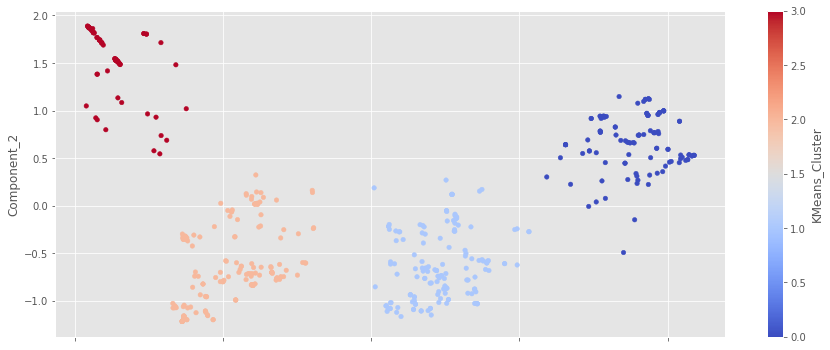

In [83]:
pca_nombres.plot.scatter(x='Component_1', y='Component_2', c='KMeans_Cluster',cmap='coolwarm', figsize=(15, 6))

In [84]:
px.scatter(pca_nombres, x="Component_1", y="Component_2", color="KMeans_Cluster", color_continuous_scale=px.colors.sequential.Viridis)